# Домашна задача 1
## Моделирање и симулација 2018/2019
### Андреј Јанчевски - 151003

<font color="green">**1. Имплементација на метод за генерирање на секвенци од вредности на логистичкото мапирање**</font>
$$
x_{n}=\lambda x_{n-1} (1-x_{n-1})
$$

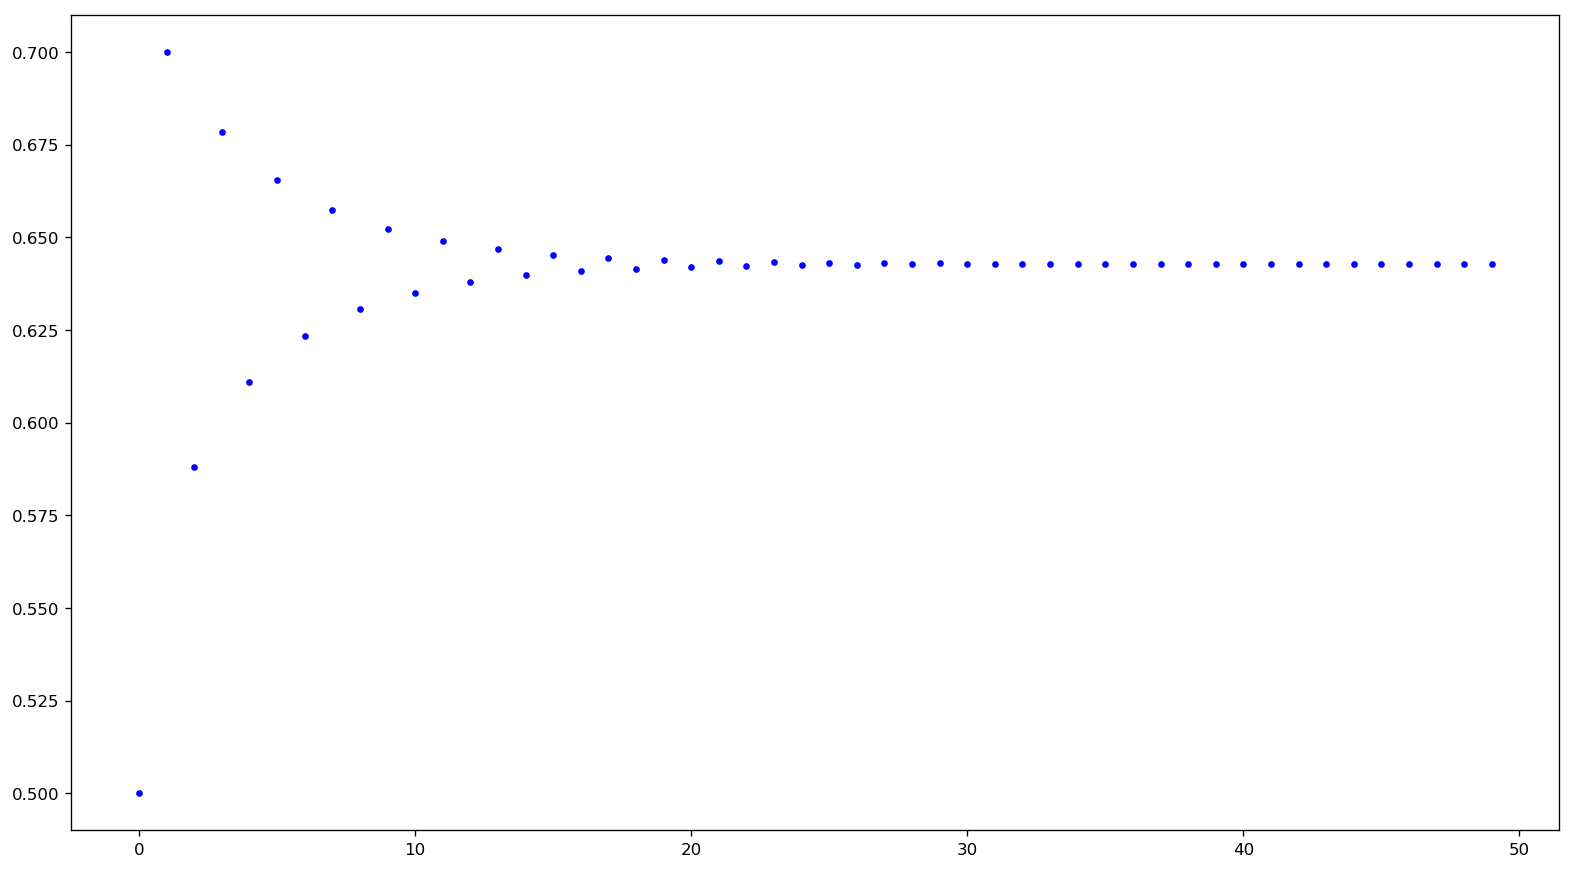

In [16]:
import numpy as np
import matplotlib.pyplot as plt


def get_logistic_map_sequence(lambda_factor, initial, num_values):
    x = np.zeros(num_values)
    x[0] = initial
    for i in range(1, num_values):
        x[i] = lambda_factor * x[i - 1] * (1 - x[i - 1])
    return x

plt.figure(figsize=(16,9),dpi=1920/16)
plt.plot(get_logistic_map_sequence(2.8,0.5,50),"b.")
plt.show()

<font color="green">**2. Цртање на бифуркацискиот дијаграм за 100 вредности на $\lambda$ од 3 до 4**</font>

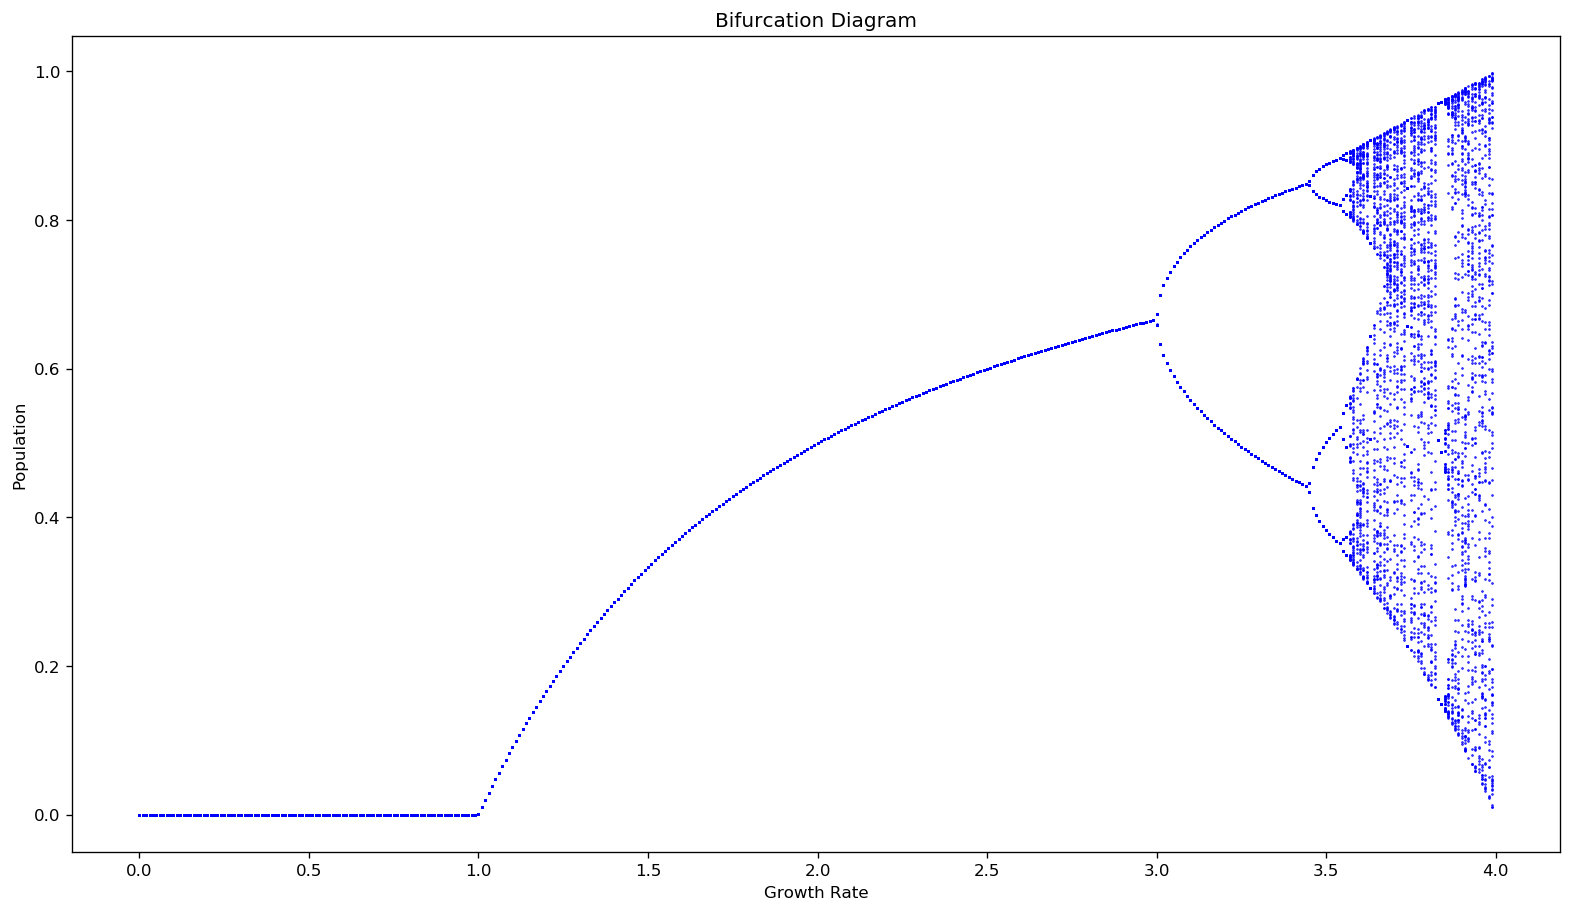

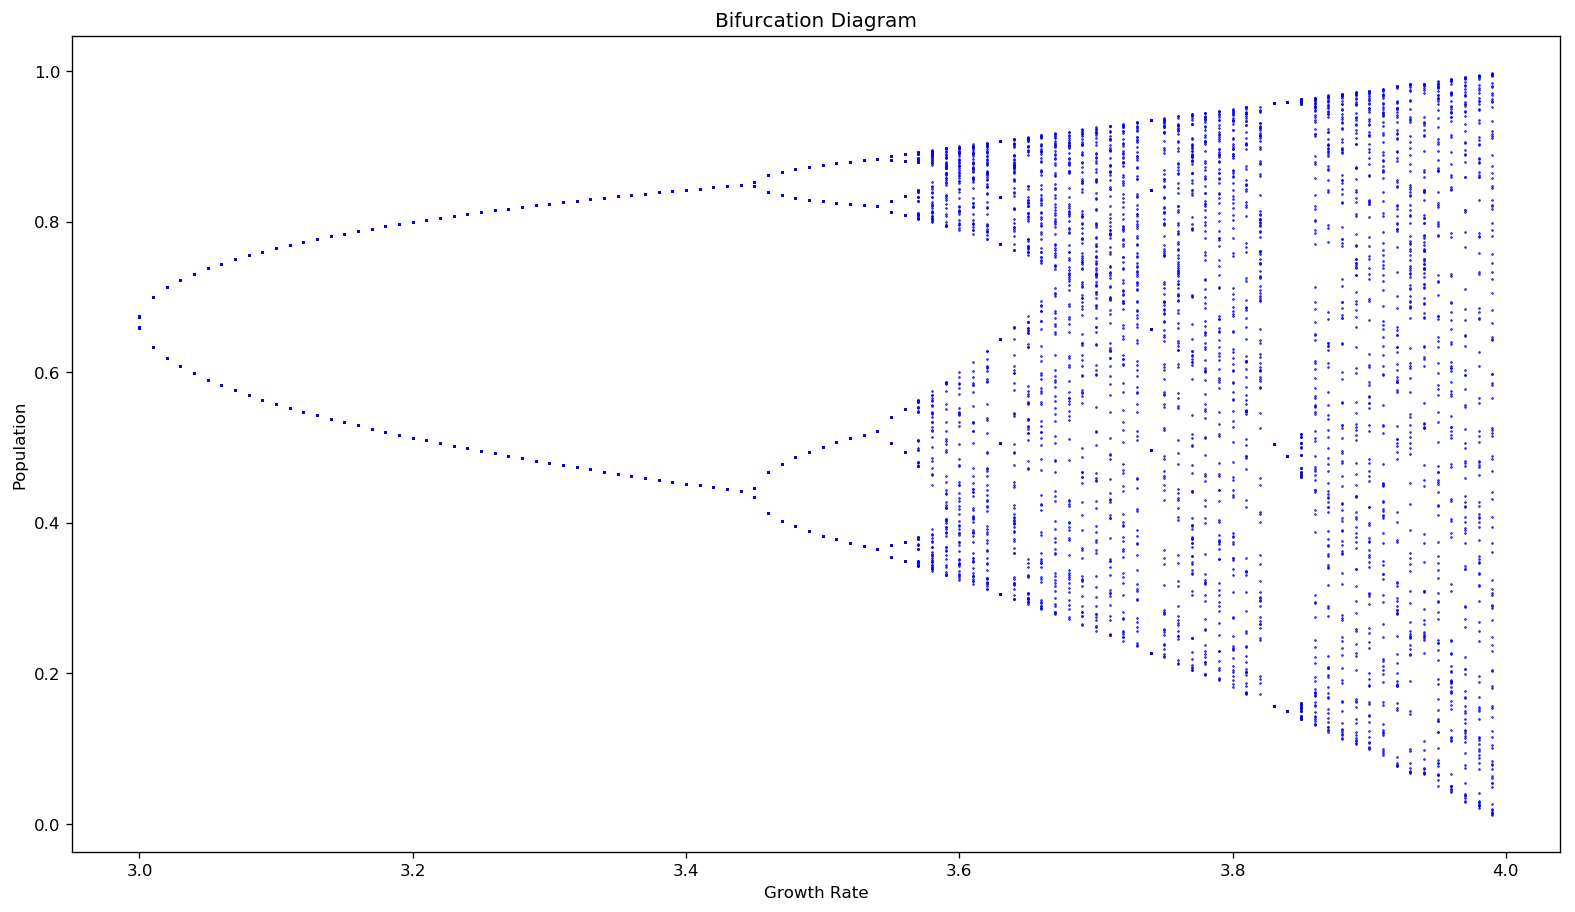

In [17]:
def plot_diagram(lambda_start, lambda_end, step_size, bifurcation_point=None):
    assert lambda_start < lambda_end
    lambda_values = np.arange(lambda_start, lambda_end, step_size)
    lambda_vectors = np.zeros((len(lambda_values), 100))

    k = 0
    for lambda_value in lambda_values:
        vector = get_logistic_map_sequence(lambda_value, 0.5, 1100)
        vector = vector[1000:1100]
        lambda_vectors[k] = vector
        k += 1
    plt.figure(figsize=(16,9),dpi=1920/16)
    plt.title("Bifurcation Diagram")
    plt.plot(lambda_values, lambda_vectors, "b.", markersize=1)
    if bifurcation_point:
        print("Bifurcation point = " + str(round(bifurcation_point, 3)))
        plt.axvline(x=bifurcation_point, color="r", linestyle="--")
    plt.xlabel("Growth Rate")
    plt.ylabel("Population")
    plt.show()

plot_diagram(0.0, 4.0, 0.01)
plot_diagram(3.0, 4.0, 0.01)

<font color="green">**3. Имплементација на рекурзивен метод за пресметување на бројот на фиксни точки во една секвенца**</font>

In [18]:
def count_fixed_points_r(sorted_sequence):
    n = len(sorted_sequence)
    middle = round(n / 2)
    left_part = sorted_sequence[0:middle]
    right_part = sorted_sequence[middle:n]
    if n > 1 and np.median(right_part) - np.median(left_part) >= 0.001:
        return count_fixed_points_r(left_part) + count_fixed_points_r(right_part)
    else:
        return 1


def count_fixed_points(sequence):
    return count_fixed_points_r(sorted(sequence))


count_fixed_points(get_logistic_map_sequence(3.2,0.5,100))

2

<font color="green">**4. Имплементација на рекурзивен метод за наоѓање на точка на бифуркација со прецизност до 3 децимали**</font>

In [19]:
def find_bifurcation_point_r(lambda_value_1, lambda_value_2):
    sequence_1 = get_logistic_map_sequence(lambda_value_1, 0.5, 11000)
    sequence_1 = sequence_1[10000:11000]
    fixed_point_count_1 = count_fixed_points(sequence_1)
    sequence_2 = get_logistic_map_sequence(lambda_value_2, 0.5, 11000)
    sequence_2 = sequence_2[10000:11000]
    fixed_point_count_2 = count_fixed_points(sequence_2)

    middle = (lambda_value_1 + lambda_value_2) / 2
    if fixed_point_count_1 != fixed_point_count_2:
        if lambda_value_2 - lambda_value_1 <= 0.0005:
            return middle
        else:
            result_left = find_bifurcation_point_r(lambda_value_1, middle)
            result_right = find_bifurcation_point_r(middle, lambda_value_2)
            if result_right is not None:
                return result_right
            elif result_left is not None:
                return result_left


def find_bifurcation_point(lambda_value_1, lambda_value_2):
    return find_bifurcation_point_r(lambda_value_1, lambda_value_2)

    
find_bifurcation_point(3.4, 3.5)

3.4494140625

<font color="green">**5. Означување на точката на бифуркација меѓу секвенците со периода 2 и 4 на дијаграмот**</font>

Bifurcation point = 3.449


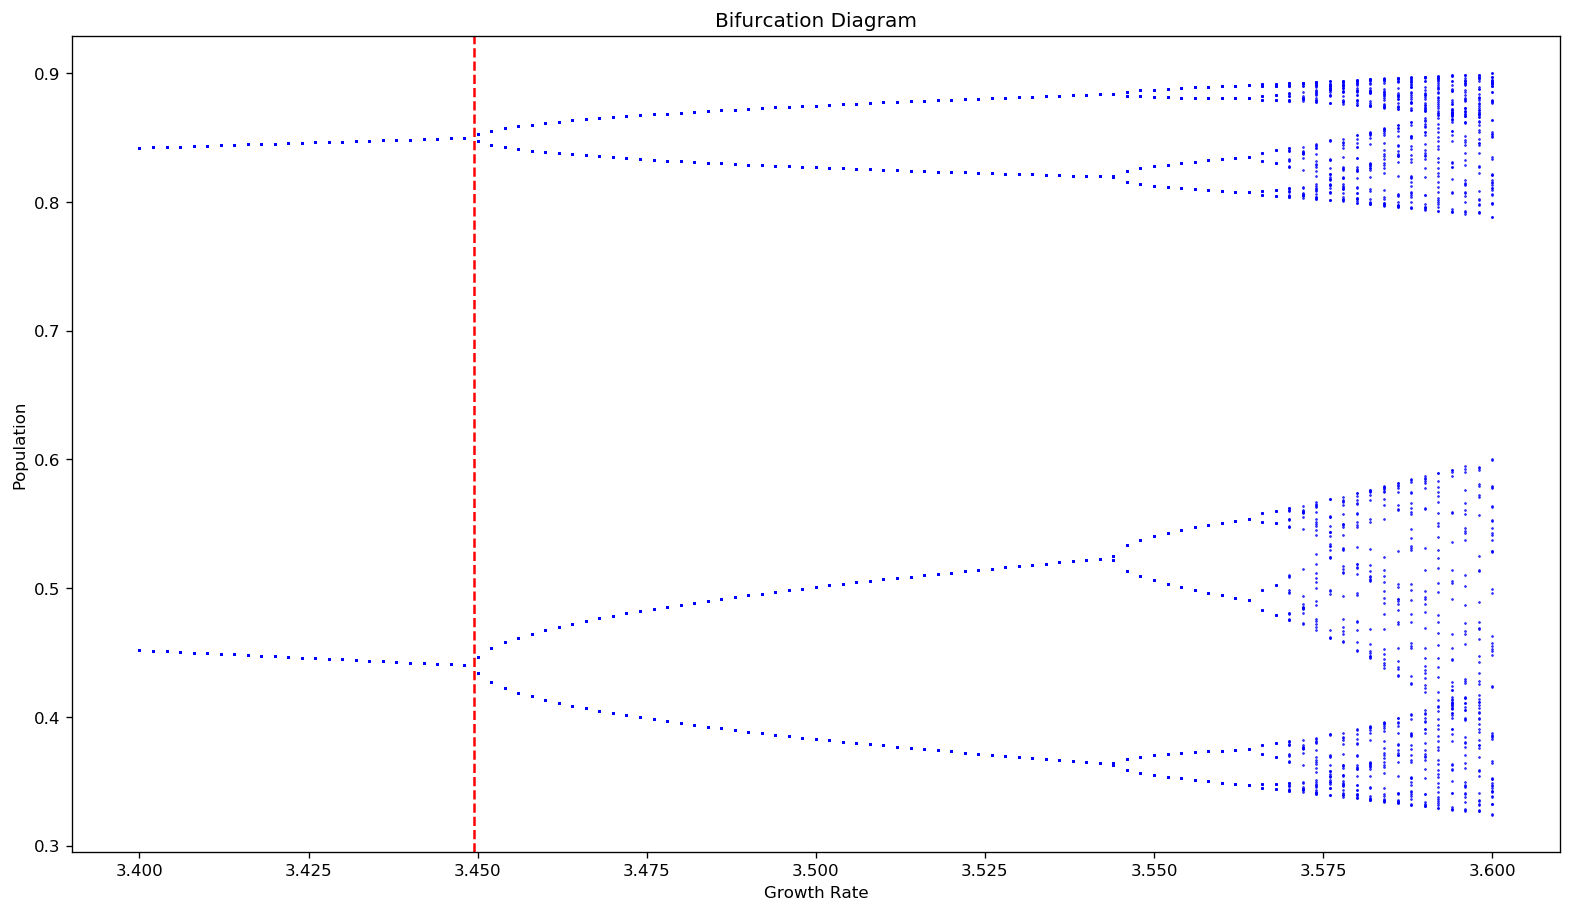

In [20]:
plot_diagram(3.4, 3.6, 0.002, find_bifurcation_point_r(3.4, 3.5))

<font color="green">**6. Означување на точката на бифуркација меѓу секвенците со периода 4 и 8 на дијаграмот**</font>

Bifurcation point = 3.544


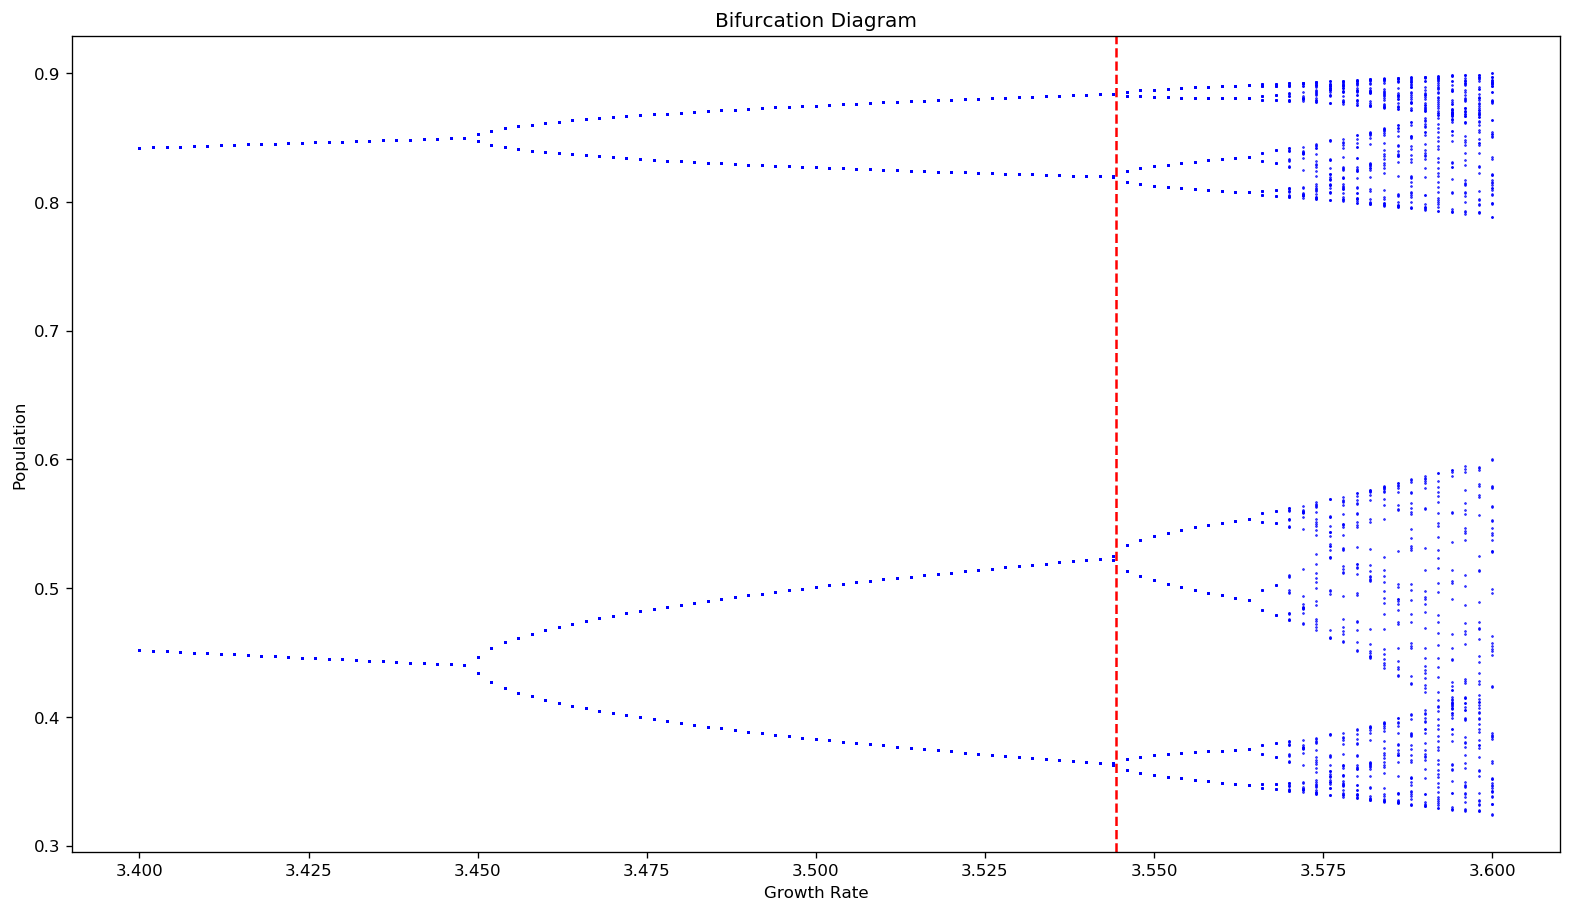

In [21]:
plot_diagram(3.4, 3.6, 0.002, find_bifurcation_point_r(3.5, 3.55))